In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 24,
    'axes.titleweight': 'bold',
    'axes.labelsize': 20,
    'axes.labelweight': 'bold',
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
})

sns.set_context('talk')
sns.set_style('whitegrid')

# Load the data
data = pd.read_csv('data/new/EVRegistrations/ev-classes.csv')
data.head()


,DATE,MONTH,HEV,NEV,PHEV,BEV,PEV,NG,Total
0,2016,12,78738,526,6019,4366,10911,3618,93267
1,2017,6,81003,759,7154,5192,13105,3860,97968
2,2017,12,82498,796,8048,6163,15007,4746,102251
3,2018,6,84093,910,9382,7590,17882,4831,106806
4,2018,12,85149,927,10566,11670,23163,4996,113308


In [20]:
# remove total column
data = data.drop('Total', axis=1)
data.head(1)

,DATE,MONTH,HEV,NEV,PHEV,BEV,PEV,NG
0,2016,12,78738,526,6019,4366,10911,3618


In [21]:
# remove NG
data = data.drop('NG', axis=1)
data.head(1)

,DATE,MONTH,HEV,NEV,PHEV,BEV,PEV
0,2016,12,78738,526,6019,4366,10911


In [22]:
# add new column for date by combing year and month
data['date_string'] = data['DATE'].astype(str) + '-' + data['MONTH'].astype(str)
data['date'] = pd.to_datetime(data['date_string'], format='%Y-%m')
data = data.drop(['DATE', 'MONTH', 'date_string'], axis=1)

# make date the first column
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

data.head(1)

,date,HEV,NEV,PHEV,BEV,PEV
0,2016-12-01,78738,526,6019,4366,10911


<Figure size 1200x900 with 0 Axes>

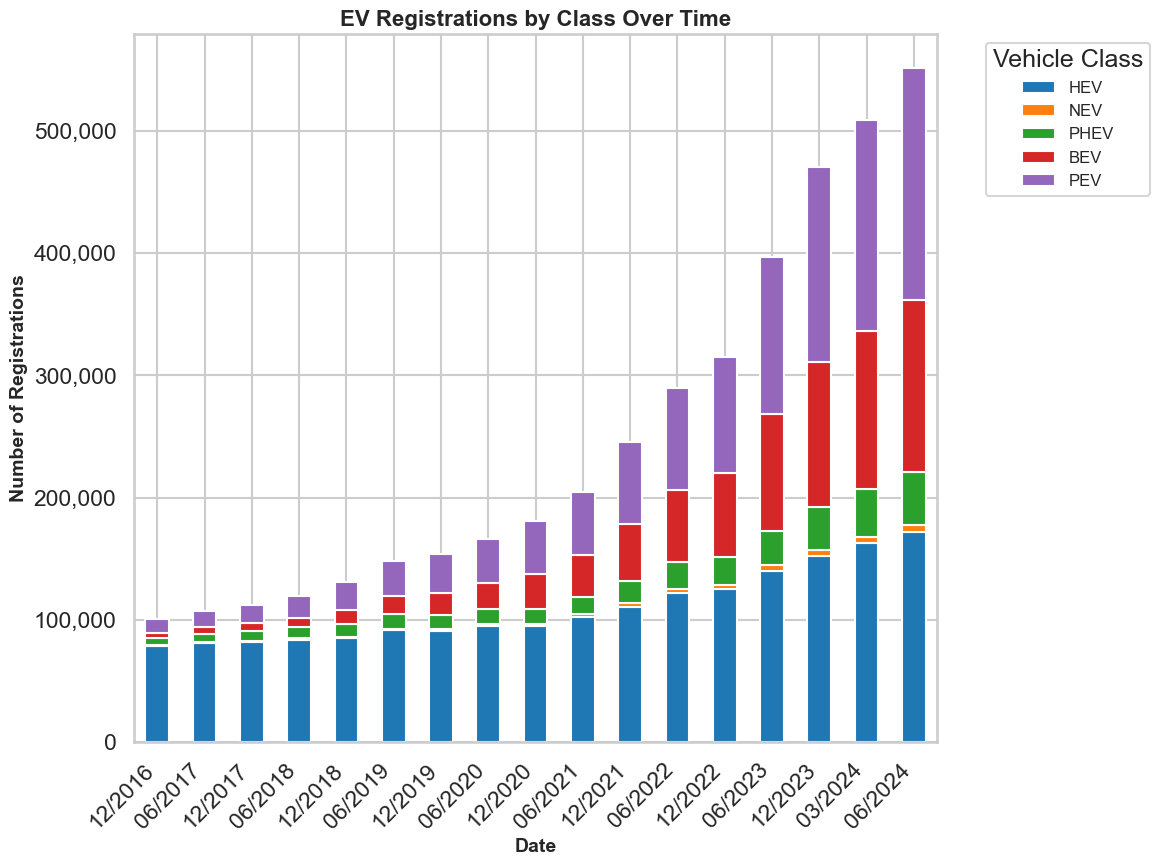

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Create a stacked bar chart showing the number of registrations for each class of vehicle over time
plt.figure(figsize=(12, 9))

# Ensure the date column is in datetime format if it's not already
data['date'] = pd.to_datetime(data['date'])

# Set the date as the index and plot the data
data.set_index('date').plot(
    kind='bar', 
    stacked=True, 
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'],
    figsize=(12, 9)
)

# Update plot title and axis labels
plt.title('EV Registrations by Class Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Registrations', fontsize=14)

# Format x-axis labels as Month/Year
plt.gca().set_xticklabels(data['date'].dt.strftime('%m/%Y'), rotation=45, ha='right')

# Format y-axis labels with commas
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Adjust legend
plt.legend(title='Vehicle Class', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


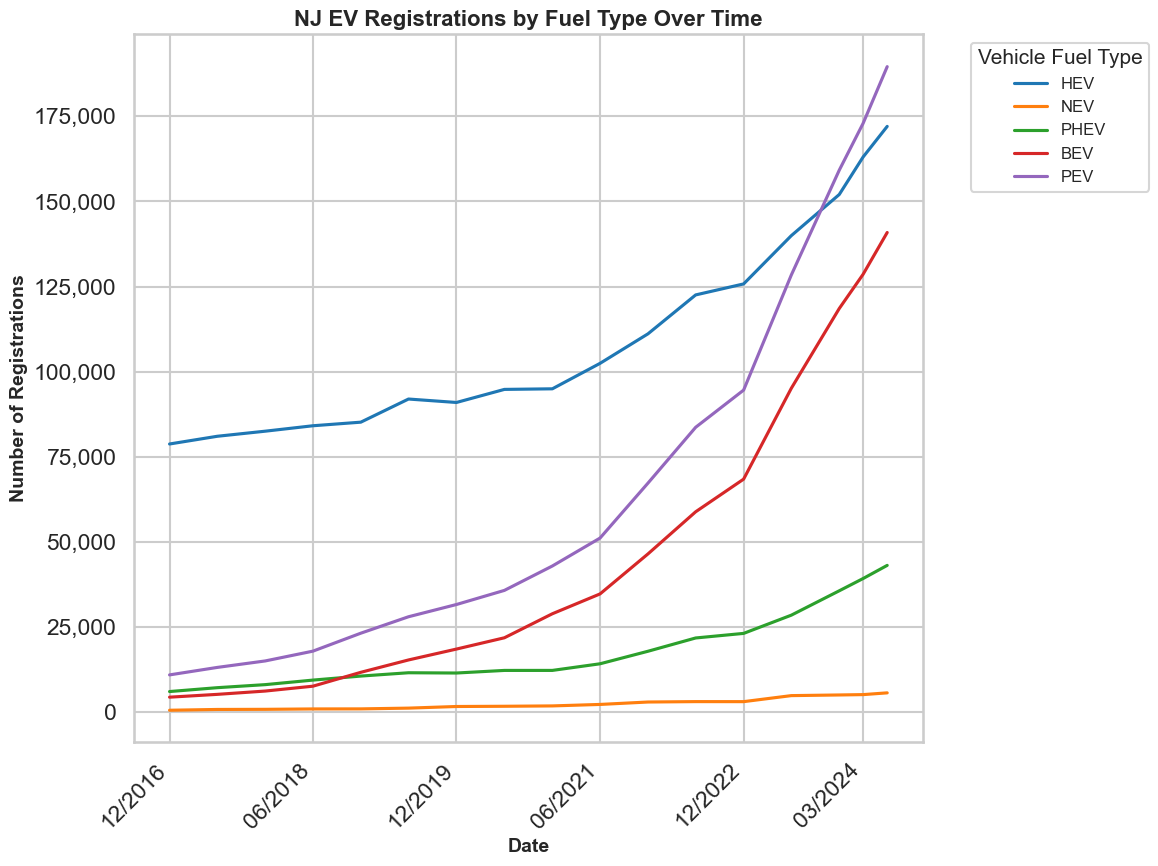

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Ensure the date column is in datetime format if it's not already
data['date'] = pd.to_datetime(data['date'])

# Create a line plot for each vehicle class over time
plt.figure(figsize=(12, 9))

# Plot the data using a line plot
for column in data.columns[1:]:  # Assuming the first column is 'date' and remaining are vehicle classes
    plt.plot(data['date'], data[column], label=column)

# Update plot title and axis labels
plt.title('NJ EV Registrations by Fuel Type Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Registrations', fontsize=14)

# Format x-axis labels as Numeric Month/Year
plt.gca().set_xticks(data['date'][::3])  # Show every 3rd month for clarity
plt.gca().set_xticklabels(data['date'][::3].dt.strftime('%m/%Y'), rotation=45, ha='right')

# Format y-axis labels with commas
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add a legend
plt.legend(title='Vehicle Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='small')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()
